# Вітаю на фінальному проєкті!
Протягом курсу ми навчились завантажувати дані в Python, трансформувати їх, чистити, агрегувати, знаходити з допомогою даних відповіді на наші питання, використовувати sql, а також Tableau! 
Задача фінального проєкту - продемонструвати той рівень роботи з даними, на якому Ви є зараз, показати, що Ви вмі
те робити.

## Робота з Excel файлом
Цей ноутбук буде присвячений аналізу даних з файла `Grocery DataBase.xlsx`. Так, це Excel файл, і ми можемо дуже просто завантажувати дані з нього у Python. Покажу пару команд для роботи з Excel файлом.

Для початку встановимо бібліотеку, яка потрібна для роботи з Excel файлами з pandas. Можна встановити тут, або в терміналі, але якщо Ви встановлюєте в терміналі, то після того треба перезапустити ядро (Kernel) ноутбуку, аби бібліотека точно підтягнулась. Іноді підтягується і без того, але це на випадок, що робити, якщо компілятор каже, що її не бачить.

В файлі ви знайдете опис колонок і значення.   

**Задача**: Уявіть, що Вам дали цей набір даних з питанням "Що корисного ми можемо з них взяти для розвитку нашого бізнесу?". То Вам необхідно розказати бізнесу історію про ці дані у форматі
1. питання, яке Вас цікавить щодо цих даних як співробітника цього бізнесу, який дуже вболіває за його успіх, 
2. код для відповіді на це питання
3. висновки, які Ви зробили з огляду на результат виконання коду: які рішення ми можемо прийняти щодо подальших кроків в аналізі або які рекомендації Ви б дали бізнесу виходячи з результатів.

**Необхідно** 

1. поставити до даних _мінімум_ 10 бізнес-питань, при цьому зробивши   
- початковий аналіз даних: їх розмір, структура, наявність пропущених значень та що з ними зробити, зміна типів даних там, де це доречно зробити (наприклад, якщо колонка завантажилась як тип string, а з опису видно, що там має бути float - варто змінити тип) - ця частина не входить у бізнес-питання, але є необхідною при аналізі даних.  
- _мінімум_ 1 зведеної таблиці (pivot) або її аналога
- _мінімум_ 5 візуалізацій, 3 з яких мають різний тип (наприклад, scatter plot, line plot, pair plot)
- _мінімум_ 1 використання тестування статистичних гіпотез. Наприклад, порівняти, чи стат значимо відрізняється певний цікавий бізнесу показник для чоловіків і жінок. Важливо, що найбільш доречно це буде, якщо той показник, який порівнюємо між групами, справді має доволі незначну різницю. Але потренуватись можна і при наявності значної. Питання тут насправді що таке "значна")) І воно залежить від співвідношення розміру середнього і стандартного відхилення.

    В даному мінімум-наборі немає вимоги на використання SQL. Але якщо Вам хочеться потренуватись, то Ви можете це зробити скориставшись pandasql. 

    Питанням може бути як "Яка є кількість унікальних чеків в цьому наборі даних?" так і щось значно складніше. Якщо у Вас складне питання, і аби відповісти на нього Ви мали відповісти на 3 менших питання (зробити якісь трансформації над даними, подивитись щось), то це рахується як 3 питання з 10 необхідних у завданні. Звісно ж Ви можете зробити більше за встановлений мінімум - все буде перевірено :)

2. Розробити систему метрик для цього бізнесу (що нам цікаво вимірювати) і побудувати Tableau репорт відповідно до системи метрик. Опублікувати Tableau репорт на Tableau public і додати посилання на нього в ноутбуці з описом на кшталт "Візуалізацію у вигляді інтерактивного репорту даних можна знайти за посиланням".

По закінченню - завантажте ноутбук на git і додаємо посилання на ноутбук в здачу роботи в Kwiga. 
До речі, з часом, Вам може захотітись доповнити цей ноутбук, коли арсенал Ваших навичок по роботі з даними розшириться. І це буде чудова ідея!

**Успіхів!**

## I. Підготовка та обробка набору даних  для подальшого аналізу

In [1]:
# Імпортування необхідних бібліотек
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from statsmodels.stats.weightstats import ztest


In [2]:
# Зчитування файлу 
path_to_file = 'C:/Users/iryna/Data_Analysys/Grocery Database.xlsx'
df = pd.read_excel(path_to_file)
df.head(3)


,Receipt Number,Date,Year,Month,Time,Mobile Number,Membership ID,Loyalty Card Points,Age,Gender,...,GST,Gross Bill Amount,Payment Mode,Bank Name,% Profit Margin,% Operating Cost,% Product Cost,Profit Margin,Operating Cost,Product Cost
0,GIJ00001,2016-01-02,2016,1,10:08:03.260000,9793548581,MIDID0001,1,36,Male,...,0.1,13.32408,Card,Enterprise Bank,0.150,0.15,0.700,1.85400,1.8540,8.65200
1,GIJ00002,2016-01-02,2016,1,15:46:50.832000,9938441276,MIDID0002,2,54,Male,...,0.1,25.26480,Card,Philippine Veterans Bank,0.118,0.15,0.732,2.73760,3.4800,16.98240
2,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,1,16,Female,...,0.1,42.18786,Cash,BDO Unibank,0.147,0.15,0.703,1.95657,1.9965,9.35693


In [3]:
# Перевірка розміру набору даних
print(f"Набір даних містить {df.shape[0]} рядків і {df.shape[1]} колонок")


Набір даних містить 50447 рядків і 32 колонок


In [4]:
# Зчитування опису колонок
xl = pd.ExcelFile(path_to_file)
descr = xl.parse('Fact Summary')
descr


,S.No.,Column Name,Description of the Column names
0,1,Receipt Number,Transaction Number
1,2,Date,Date of Transaction
2,3,Year,Year of Transaction
3,4,Month,Month of Transaction
4,5,Time,Time of the transaction
5,6,Mobile Number,Monbile number of the customer
6,7,Membership ID,Unique Membership ID of the Customer
7,8,Loyalty Card Points,Loyalty Points earned by customer (10 Points/1...
8,9,Age,Age of the Customer in the Company Database
9,10,Gender,Gender of the customer


In [5]:
# Перевірка типів даних 
df.dtypes


Receipt Number                 object
Date                   datetime64[ns]
Year                            int64
Month                           int64
Time                           object
Mobile Number                   int64
Membership ID                  object
Loyalty Card Points             int64
Age                             int64
Gender                         object
City                           object
Country                        object
Category                       object
Sub_Category                   object
Items                          object
Brand                          object
Description                    object
Price                         float64
QTY                             int64
DISC                          float64
Amount                        float64
Net Bill Amount               float64
GST                           float64
Gross Bill Amount             float64
Payment Mode                   object
Bank Name                      object
% Profit Mar

In [6]:
# Перевірка на пропущені значення
df.isna().sum()


Receipt Number         0
Date                   0
Year                   0
Month                  0
Time                   0
Mobile Number          0
Membership ID          0
Loyalty Card Points    0
Age                    0
Gender                 0
City                   0
Country                0
Category               0
Sub_Category           0
Items                  0
Brand                  0
Description            0
Price                  0
QTY                    0
DISC                   0
Amount                 0
Net Bill Amount        0
GST                    0
Gross Bill Amount      0
Payment Mode           0
Bank Name              0
% Profit Margin        0
% Operating Cost       0
% Product Cost         0
Profit Margin          0
Operating Cost         0
Product Cost           0
dtype: int64

Пропущені значення відсутні у наборі даних.

In [7]:
# Налаштування датафрейму для висвітлення всіх колонок
pd.set_option('display.max_columns', None)
df.head()


,Receipt Number,Date,Year,Month,Time,Mobile Number,Membership ID,Loyalty Card Points,Age,Gender,City,Country,Category,Sub_Category,Items,Brand,Description,Price,QTY,DISC,Amount,Net Bill Amount,GST,Gross Bill Amount,Payment Mode,Bank Name,% Profit Margin,% Operating Cost,% Product Cost,Profit Margin,Operating Cost,Product Cost
0,GIJ00001,2016-01-02,2016,1,10:08:03.260000,9793548581,MIDID0001,1,36,Male,Jakarta,Indonesia,"Choco, Snacks, Sweets",Biscuits & Crackers,Oreo mini oreo sharepack,Oreo,540 g,3.09,4,0.02,12.1128,12.1128,0.1,13.32408,Card,Enterprise Bank,0.150,0.15,0.700,1.85400,1.8540,8.65200
1,GIJ00002,2016-01-02,2016,1,15:46:50.832000,9938441276,MIDID0002,2,54,Male,Jakarta,Indonesia,"Wines, Beers & Spirits",Beer,Ashai Lager Beer,Ashai,480 ml,11.60,2,0.01,22.9680,22.9680,0.1,25.26480,Card,Philippine Veterans Bank,0.118,0.15,0.732,2.73760,3.4800,16.98240
2,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,1,16,Female,Jakarta,Indonesia,Fruit & Vegetable,Frozen Fruits,Cascadian farm organic strawberries,Cascadiam Farm,1 Kg,13.31,1,0.01,13.1769,38.3526,0.1,42.18786,Cash,BDO Unibank,0.147,0.15,0.703,1.95657,1.9965,9.35693
3,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,1,16,Female,Jakarta,Indonesia,Fruit & Vegetable,Fresh Vegetables,Oraganic 4 Life Red onions,Organic 4 Life,270 g,3.52,1,0.01,3.4848,38.3526,0.1,42.18786,Cash,BDO Unibank,0.095,0.15,0.755,0.33440,0.5280,2.65760
4,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,2,16,Female,Jakarta,Indonesia,Fruit & Vegetable,Lettuce & Salads,LIVEWELL Italian mesclun salad,LIVEWELL,570 g,4.41,1,0.01,4.3659,38.3526,0.1,42.18786,Cash,BDO Unibank,0.120,0.15,0.730,0.52920,0.6615,3.21930


In [8]:
# Перевірка на здубльовані рядки
df[df.duplicated()]


,Receipt Number,Date,Year,Month,Time,Mobile Number,Membership ID,Loyalty Card Points,Age,Gender,City,Country,Category,Sub_Category,Items,Brand,Description,Price,QTY,DISC,Amount,Net Bill Amount,GST,Gross Bill Amount,Payment Mode,Bank Name,% Profit Margin,% Operating Cost,% Product Cost,Profit Margin,Operating Cost,Product Cost
32664,GSB00094,2016-02-12,2016,2,14:01:00.088000,9853108031,MIDSG0091,2,60,Female,Bedok,Singapore,"Choco, Snacks, Sweets",snacks,Tostitos medium chunky salsa,Tostitos,270 g,4.14,1,0.05,3.933,7.866,0.07,8.41662,Cash,ING Bank,0.093,0.15,0.757,0.38502,0.621,3.13398


In [9]:
# Перевірка, чи здубльовані рядки можуть мати суттєвий вплив на подальший аналіз
df[df['Receipt Number'] == "GSB00094"]


,Receipt Number,Date,Year,Month,Time,Mobile Number,Membership ID,Loyalty Card Points,Age,Gender,City,Country,Category,Sub_Category,Items,Brand,Description,Price,QTY,DISC,Amount,Net Bill Amount,GST,Gross Bill Amount,Payment Mode,Bank Name,% Profit Margin,% Operating Cost,% Product Cost,Profit Margin,Operating Cost,Product Cost
32663,GSB00094,2016-02-12,2016,2,14:01:00.088000,9853108031,MIDSG0091,2,60,Female,Bedok,Singapore,"Choco, Snacks, Sweets",snacks,Tostitos medium chunky salsa,Tostitos,270 g,4.14,1,0.05,3.933,7.866,0.07,8.41662,Cash,ING Bank,0.093,0.15,0.757,0.38502,0.621,3.13398
32664,GSB00094,2016-02-12,2016,2,14:01:00.088000,9853108031,MIDSG0091,2,60,Female,Bedok,Singapore,"Choco, Snacks, Sweets",snacks,Tostitos medium chunky salsa,Tostitos,270 g,4.14,1,0.05,3.933,7.866,0.07,8.41662,Cash,ING Bank,0.093,0.15,0.757,0.38502,0.621,3.13398


Оскільки здубльовані рядки можуть зовсім незначно вплинути на загальний аналіз (невелика кількість товарів та сума чеку), можемо їх не видаляти.

Перевіримо, кількість чеків у наборі даних

In [10]:
print(f"Набір даних містить {df['Receipt Number'].nunique()} унікальних чеків")


Набір даних містить 13048 унікальних чеків


Перевіримо, чи дані підраховані коректно у чеків, на яких є більше однієї позиції на прикладі GIJ00003

In [11]:
# Виведення вартості нетто вказаної для чеку
df[df['Receipt Number'] == 'GIJ00003']['Net Bill Amount']


2    38.3526
3    38.3526
4    38.3526
5    38.3526
6    38.3526
7    38.3526
Name: Net Bill Amount, dtype: float64

In [12]:
# Підрахунок дійсної вартості нетто 
df[df['Receipt Number'] == 'GIJ00003'].Amount.sum()


30.769199999999998

Ми бачимо, що дані не співпадають, а одже нам треба зробити перерахунок. Варто дослідити, чому так сталося. Можливо, на якісь продукти були повернення, але вони не враховані у цьому наборі даних.

In [13]:
# Додавання колонок з новими перерахованими вартостями
df['Net Amount Recalc'] = df.Price * df.QTY *(1-df.DISC)
df['Gross Amount Recalc'] = df['Net Amount Recalc'] * (1 + df.GST)
df.head()


,Receipt Number,Date,Year,Month,Time,Mobile Number,Membership ID,Loyalty Card Points,Age,Gender,City,Country,Category,Sub_Category,Items,Brand,Description,Price,QTY,DISC,Amount,Net Bill Amount,GST,Gross Bill Amount,Payment Mode,Bank Name,% Profit Margin,% Operating Cost,% Product Cost,Profit Margin,Operating Cost,Product Cost,Net Amount Recalc,Gross Amount Recalc
0,GIJ00001,2016-01-02,2016,1,10:08:03.260000,9793548581,MIDID0001,1,36,Male,Jakarta,Indonesia,"Choco, Snacks, Sweets",Biscuits & Crackers,Oreo mini oreo sharepack,Oreo,540 g,3.09,4,0.02,12.1128,12.1128,0.1,13.32408,Card,Enterprise Bank,0.150,0.15,0.700,1.85400,1.8540,8.65200,12.1128,13.32408
1,GIJ00002,2016-01-02,2016,1,15:46:50.832000,9938441276,MIDID0002,2,54,Male,Jakarta,Indonesia,"Wines, Beers & Spirits",Beer,Ashai Lager Beer,Ashai,480 ml,11.60,2,0.01,22.9680,22.9680,0.1,25.26480,Card,Philippine Veterans Bank,0.118,0.15,0.732,2.73760,3.4800,16.98240,22.9680,25.26480
2,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,1,16,Female,Jakarta,Indonesia,Fruit & Vegetable,Frozen Fruits,Cascadian farm organic strawberries,Cascadiam Farm,1 Kg,13.31,1,0.01,13.1769,38.3526,0.1,42.18786,Cash,BDO Unibank,0.147,0.15,0.703,1.95657,1.9965,9.35693,13.1769,14.49459
3,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,1,16,Female,Jakarta,Indonesia,Fruit & Vegetable,Fresh Vegetables,Oraganic 4 Life Red onions,Organic 4 Life,270 g,3.52,1,0.01,3.4848,38.3526,0.1,42.18786,Cash,BDO Unibank,0.095,0.15,0.755,0.33440,0.5280,2.65760,3.4848,3.83328
4,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,2,16,Female,Jakarta,Indonesia,Fruit & Vegetable,Lettuce & Salads,LIVEWELL Italian mesclun salad,LIVEWELL,570 g,4.41,1,0.01,4.3659,38.3526,0.1,42.18786,Cash,BDO Unibank,0.120,0.15,0.730,0.52920,0.6615,3.21930,4.3659,4.80249


In [14]:
# Запис оновленого набору даних
df.to_excel('Grocery Database Recalculated.xlsx', index=False)


## II. Дослідження даних

#### 1. Перегляньмо, який розподіл продажів по категоріям у різних країнах та містах за допомогою зведеної таблиці.

In [15]:
# Побудова зведеної таблиці
pivot_category_by_country_sales = df.pivot_table(index=['Country', 'City'], columns='Category', values = 'Gross Amount Recalc', aggfunc='sum')
display(pivot_category_by_country_sales.style.background_gradient(axis=None, cmap='Oranges'))


###### Висновок:

Ми бачимо, що найбільші продажі у місті Маніла, а найбільш популярними категоріями є випічка та сніданок, заморожені продукти і товари для догляду за красою.

#### 2. Визначимо, яке співвіднощення статі покупців за допомогою кругової діаграми.

In [16]:
# Обчислення кількості чоловіків і жінок серед покупців
gender_counts = df['Gender'].value_counts()


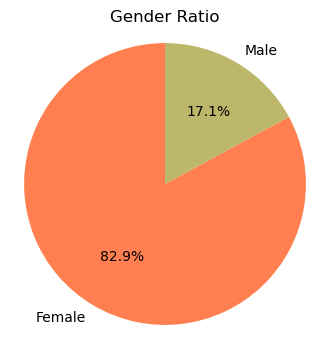

In [17]:
# Побудова кругової діаграми
plt.figure(figsize=(4, 4))
plt.pie(gender_counts, labels = gender_counts.index, colors = ['coral', 'darkkhaki'], autopct='%1.1f%%', startangle=90)
plt.title('Gender Ratio')
plt.axis('equal')
plt.show();


###### Висновок:

Серед покупців суттєво переважають жінки.

#### 3. Перевіримо, чи відрізняється популярність категорій  залежно від статі покупців за допомогою стовпчастої діаграми.

In [18]:
# Групування даних за категорією та статтю та обчислення суми продажів
sales_by_category_gender = df.groupby(['Category', 'Gender'])['Gross Amount Recalc'].sum()
sales_by_category_gender_df = sales_by_category_gender.unstack()
sales_by_category_gender_df.sort_values(ascending=False, by='Male', inplace=True)


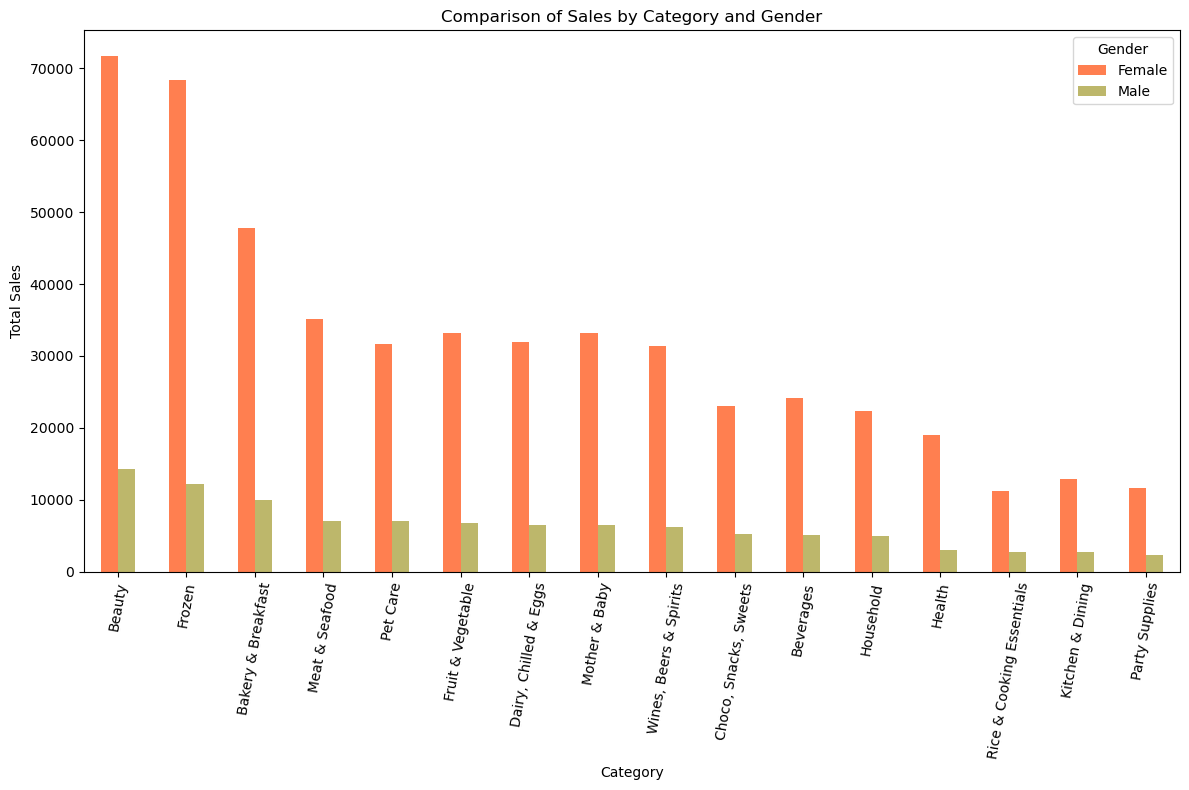

In [19]:
# Побудова стовпчастої діаграми для порівняння сум продажів за категоріями та статтями
sales_by_category_gender_df.plot.bar(figsize=(12, 8), color = ['coral', 'darkkhaki'])
plt.title('Comparison of Sales by Category and Gender')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=80)
plt.legend(title='Gender')
plt.tight_layout()
plt.show();


###### Висновок:

Ми бачимо, що уподобання чоловіків і жінок незначно відрізнізняються, проте для обох статей найбільш популярними категоріями є випічка та сніданок, заморожені продукти і товари для догляду за красою.

#### 4. Розрахуємо статистичну значимість різниці в середній сумі покупок між чоловіками та жінками за допомогою z-тесту.

Припустимо, що немає статистично значущої різниці між середньою сумою покупок між чоловіками та жінками. Таким чином:
H0 - Немає статистично значимої різниці в середній сумі покупок між чоловіками та жінками.
H1 - Є статистично значима різниця в середній сумі покупок між чоловіками та жінками.

In [20]:
# Підготовка даних
male_data = df[df['Gender'] == 'Male']['Gross Amount Recalc']
female_data = df[df['Gender'] == 'Female']['Gross Amount Recalc']
alpha = 0.05

# Виконання z-тесту
z_statistic, p_value = ztest(male_data, female_data)

# Виведення результату
print("p-значення:", p_value)

# Визначення статистичної значимості
if p_value < alpha:
    print("Є статистично значима різниця в середній сумі покупок між чоловіками та жінками. Відхилити H0")
else:
    print("Немає статистично значимої різниці в середній сумі покупок між чоловіками та жінками. Не можна відхилити H0")
    
print(f'Середня сума покупок чоловіків - {male_data.mean():.2f}')
print(f'Середня сума покупок жінок - {female_data.mean():.2f}')

p-значення: 0.020065264441625222
Є статистично значима різниця в середній сумі покупок між чоловіками та жінками. Відхилити H0
Середня сума покупок чоловіків - 11.89
Середня сума покупок жінок - 12.17


#### 5. Перевіримо віковий розподіл покупців за допомогою гістограми, щоб дізнатися, покупців якого віку відвідує магазини найбільше та найменше

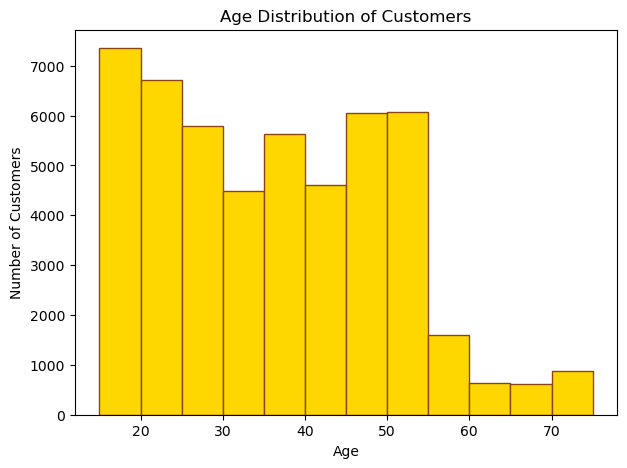

In [21]:
# Побудова гістограми
plt.figure(figsize=(7, 5))
plt.hist(df['Age'], bins=12, color='gold', edgecolor='saddlebrown')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.show();


###### Висновок:

Ми бачимо, що найбільшу кількість товарів купують люди молодого віку до 25 років, натомість кількість покупців старших за 55 років є суттєво нижчою за середній показник. Можливо, варто запровадити додаткові знижки для пенсіонерів, з ціллю приваблення нових покупців старшої вікової групи.

#### 6. Погляньмо, чи є зв'язок між віком клієнтів та ціною товарів за домогою графіка розсіювання.

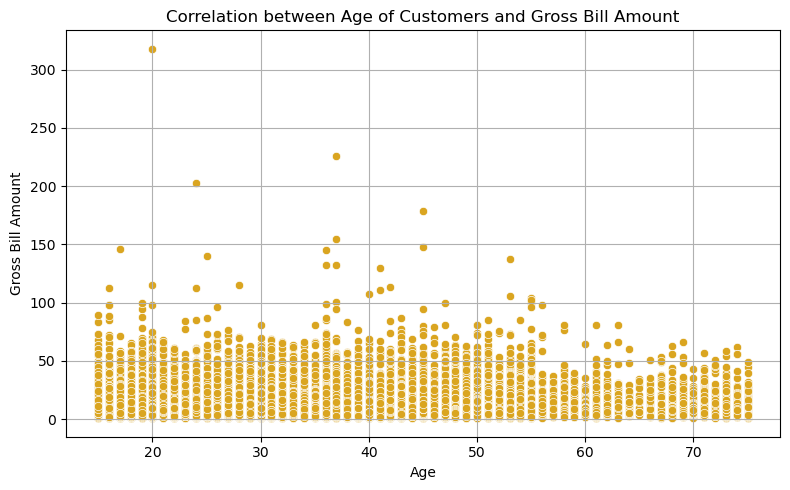

In [22]:
# Побудова графіка залежності між віком клієнтів і сумою покупок
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Age', y='Gross Amount Recalc', data=df, color='goldenrod')
plt.title('Correlation between Age of Customers and Gross Bill Amount')
plt.xlabel('Age')
plt.ylabel('Gross Bill Amount')
plt.grid(True)
plt.tight_layout()
plt.show();


###### Висновок:

З графіка розсіювання видно, що немає зв'яку між віком клієнтів та вартістю придбаних ними товарів.

#### 7. Погляньмо на динаміку продажів за наданий період за допомогою лінійного графіку

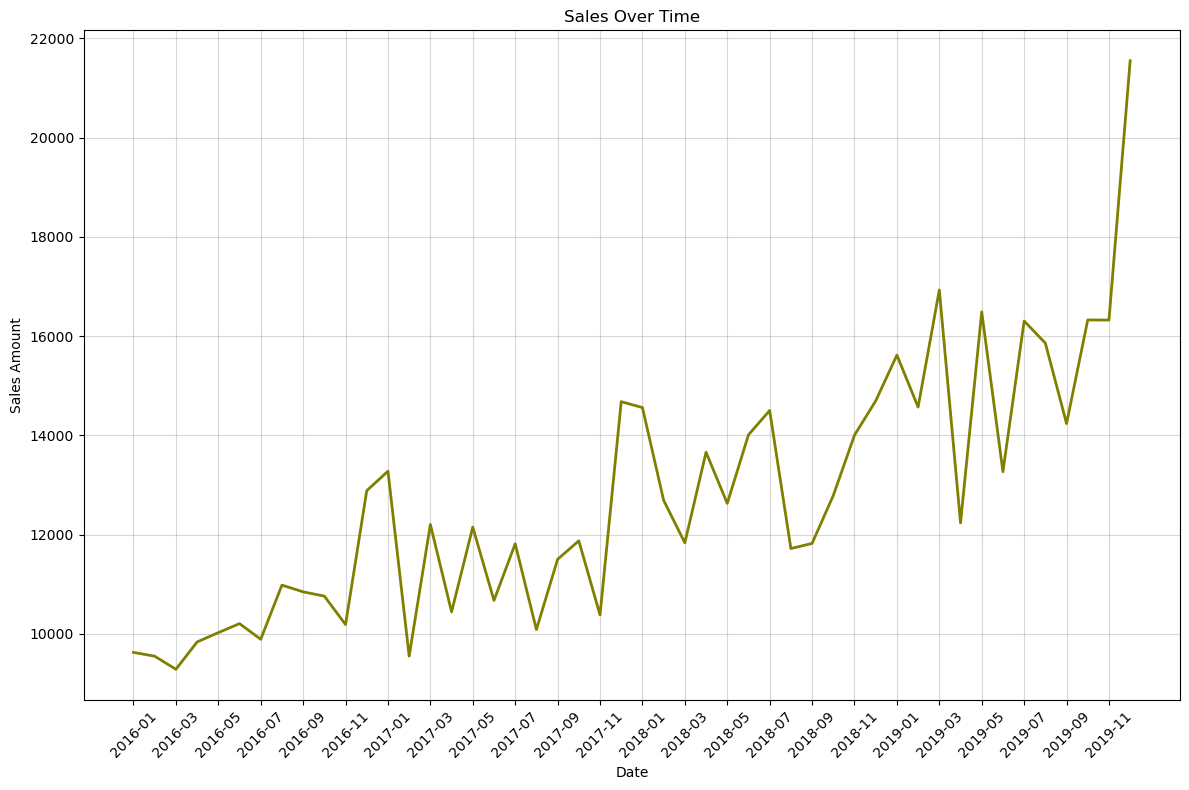

In [23]:
# Побудова лінійного графіка
sales_by_date = df.groupby(df['Date'].dt.strftime('%Y-%m'))['Gross Amount Recalc'].sum()
plt.figure(figsize=(12, 8))
sales_by_date.plot(color='olive', linewidth=2)
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.grid(True, alpha=0.5)
plt.xticks(range(0, len(sales_by_date.index), 2), sales_by_date.index[::2], rotation=45)
plt.tight_layout()
plt.show();
    

###### Висновок:

Загалом спостерігається позитивна динаміка продажів з року на рік. Ми можемо помітити, що найбільший зріст щороку відбувається в грудні, що збігається з передсвятковим періодом, а найбільший спад в лютому-квітні та в літні місяці, на які зазвичай припадають канікули та відпустки. 

Можна запровадити додаткові знижки та розпродажі у місяці, коли продажі найменші, щоб заохотити клієтнів купувати більше.

#### 8. Перевіримо, які категорії є найбільш прибутковими за допомогою гістограми.

In [24]:
# Обчислення та сортування загального прибутку для кожної категорії
category_profit = df.groupby('Category')['Profit Margin'].sum()
category_profit_sorted = category_profit.sort_values(ascending=False)


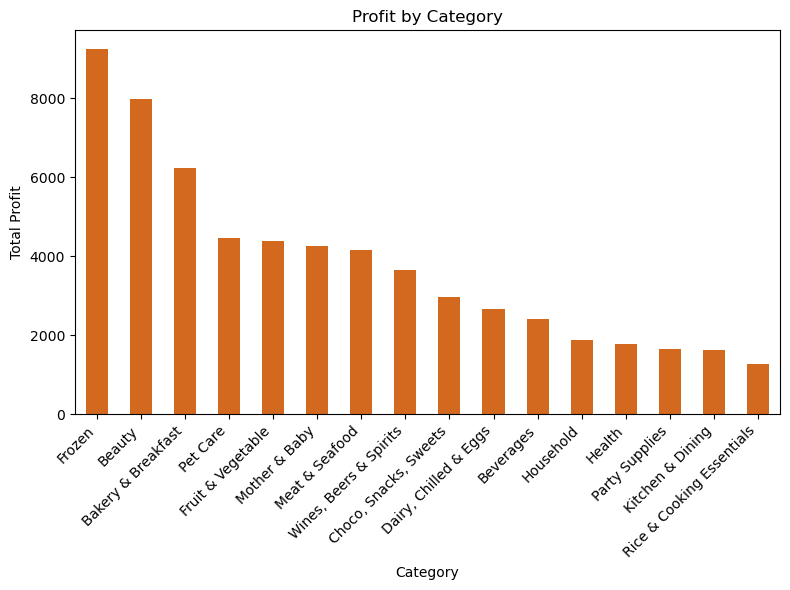

In [25]:
# Побудова гістограми
plt.figure(figsize = (8, 6))

category_profit_sorted.plot.bar(color='chocolate')
plt.title('Profit by Category')
plt.xlabel('Category')
plt.ylabel('Total Profit')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show();


###### Висновок:

Ми бачимо, що категорії заморожені продукти, товари для догляду за красою і випічка та сніданок є також найбільш прибутковими.

#### 9. Погляньмо, які товари є найбільш прибутковими

In [26]:
# Створення датафрейму з найбільш прибутковими товарами
profit_by_item = df.groupby(['Category','Items'])['Profit Margin'].sum()
most_profitable_items = profit_by_item.sort_values(ascending=False)
top_profitable_items_df = most_profitable_items.head(10).reset_index()
top_profitable_items_df


,Category,Items,Profit Margin
0,"Wines, Beers & Spirits",Ashai Lager Beer,1764.15428
1,Fruit & Vegetable,Cascadian farm organic strawberries,1094.56347
2,Pet Care,Alpo Chicken pate dog food,995.04248
3,Pet Care,Lamb pate dog food,915.99124
4,"Dairy, Chilled & Eggs",Fresh Soyamilk,845.88239
5,Pet Care,PEDIGREE Adult complete nuritition dog food,765.48708
6,"Choco, Snacks, Sweets",Sainsbury salted tortilla chips,697.49070
7,Frozen,Minced Pork,669.52017
8,Beauty,Pro-health cool mint,663.10610
9,Frozen,Nile fish,637.64624


###### Висновок:

Найбільш прибутковим товаром є пиво Ashai Lager Beer. Цей товар варто розміщувати у найбільш легкодоступних місцях, таких як торці торгових рядів та холодильники біля кас, щоб забезпечити максимальну видимість та доступність для клієнтів.

#### 10. Перевіримо, чи якийсь спосіб оплати є більш популярним за допомогою стовпчастої діаграми.

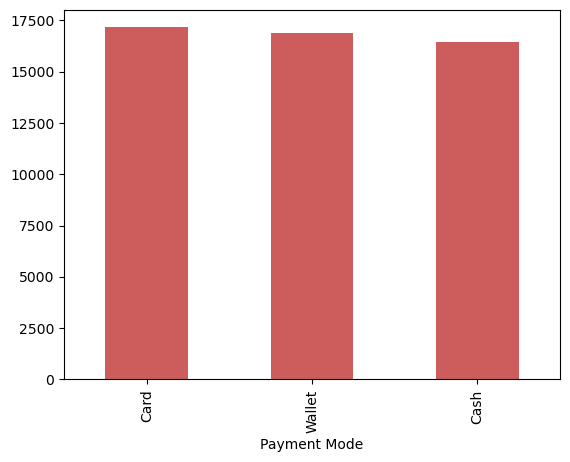

In [27]:
# Підрахунок кількості платежів за способом розрахунку
payment_popularity = df['Payment Mode'].value_counts()
payment_popularity.plot.bar(color='indianred');


###### Висновок:

Усі способи оплати є приблизно однаково популярні.

#### 11. Погляньмо, які банки є найбільш поширеними серед наших клієнтів.

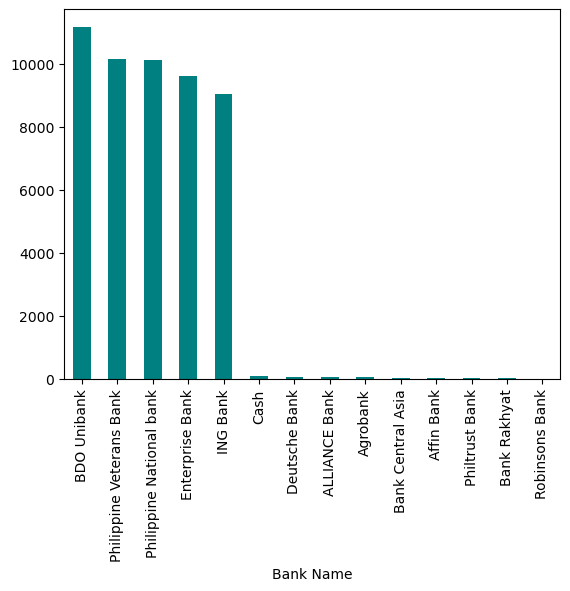

In [28]:
bank_clients = df['Bank Name'].value_counts()
bank_clients.plot.bar(color='teal');


###### Висновок:

Ми бачимо, що найбільш популярними банками серед покупців є BDO Unibank, Philippine Veterans Bank, Philippine National Bank, Enterprise Bank та ING Bank. Ми можемо припустити, що ці банки є також найбільш поширені в країнах, в яких представлені наші магазини. Можна запровадити кешбек-програму для клієнтів цих банків, оскільки це може допомогти збільшити продажі серед вже існуючих наших покупців, а також привабити нових.

##### За цим посиланням доступна інтерактивна візуалізація даних у формі звіту:

https://public.tableau.com/views/GrocerySalesDashboard_17100786078460/GroceryStoreSalesDashboard?:language=en-US&:sid=&:display_count=n&:origin=viz_share_link